<img src="https://pmarote.net/tcc/icmc_logo.png"  width="192px" align="right">
<p style="text-align: center; font-size: 200%; font-weight: bold; margin-top: 10px;"><b>UNIVERSIDADE DE SÃO PAULO</b></a></p>
<p style="text-align: center; font-size: 150%; font-weight: bold; margin-top: 10px;">Instituto de Ciências Matemáticas e de Computação</a></p><br>

---
### <div style="text-align: center"><font color="navy">Uso de técnicas de processamento de linguagem natural:<br><br>Aplicação em Decisões do Contencioso Administrativo Fiscal na Secretaria da Fazenda do Estado de São Paulo.</font></div>
### <div style="text-align: left"><font color= #333>Paulo Ricardo dos Santos Olim Marote<br><br>Trabalho de Conclusão de Curso - MBA em Ciência de Dados (CEMEAI)</font></div>
- **Parte II - Aprendizado de Máquina (Machine Learning)**
<p style="text-align: right; font-size: 100%; opacity: 0.8; margin-top: 0px;">USP - São Carlos - 2023</p>

## 🚴 Carregamento e Unzip de Bibliotecas Auxiliares
- **Verificar a esquerda em 📁 se há arquivos carregados. Se não, utilizar este código logo ao iniciar**

In [ ]:
import shutil
import requests
import os
import zipfile

def download_and_local_save(url, caminho_local):
    # Fazer uma requisição GET para a URL
    response = requests.get(url)
    # Verificar se a requisição foi bem-sucedida
    if response.status_code == 200:
        with open(caminho_local, 'wb') as f:
            f.write(response.content)
        print(f"Arquivo baixado com sucesso de {url} e salvo como {caminho_local}.")
    else:
        print(f"Falha ao baixar o arquivo {url}. Código de status: {response.status_code}.")

def extrai(zip_file):
    # se o arquivo possuir "_", transforma para "/" e cria a pasta
    dir_extract_zip_file, extension = os.path.splitext(zip_file)
    dir_extract_zip_file = os.path.join('/content', dir_extract_zip_file)
    if '_' in dir_extract_zip_file:
        dir_extract_zip_file = os.path.join('/content',
                                            dir_extract_zip_file.replace("_", "/"))
    print(dir_extract_zip_file)
    if os.path.exists(dir_extract_zip_file):
        shutil.rmtree(dir_extract_zip_file)
    # os.makedirs(dir_extract_zip_file, exist_ok=True)
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(dir_extract_zip_file))
    print(f"Extraído {zip_file} para {os.path.dirname(dir_extract_zip_file)} !")
    os.remove(zip_file)

download_and_local_save('https://www.pmarote.net/tcc/core.zip',
                        '/content/core.zip')
download_and_local_save('https://www.pmarote.net/tcc/var_tcc.db.zip',
                        '/content/var_tcc.db.zip')

extrai('core.zip')
extrai('var_tcc.db.zip')

Arquivo baixado com sucesso de https://www.pmarote.net/tcc/core.zip e salvo como /content/core.zip.
Arquivo baixado com sucesso de https://www.pmarote.net/tcc/var_tcc.db.zip e salvo como /content/var_tcc.db.zip.
/content/core
Extraído core.zip para /content !
/content/var/tcc.db
Extraído var_tcc.db.zip para /content/var !


## 🔛 Importações e Inicialização
  - código inicial, carregando as bibliotecas necessárias, bem como as bibliotecas desenvolvidas para este TCC, que estão em /content/core
  - aqui também são definidas algumas funções 'helpers' para utilização nos códigos, como de formatação de números para português-Brasil

In [66]:
import os
import ipywidgets as widgets
import pandas as pd
import numpy as np
from IPython.display import display, HTML

import core  # apenas insere o diretório ./core em sys.path
from Config import Config
from WebScraper import WebScraper
from Db import Db
config = Config.getConfigs()
db = Db(config['VAR_DIR'])
print("config = ", config)

# duas funções para dar uma melhor formatação em português
def int_f(val):
    return "{:,}".format(val).replace(',','.')
def two_dec_f(val):
    return "{:,.2f}".format(val).replace(',','#').replace('.',',').replace('#','.')
# styler em português para pandas
def df_style(styler):
    styler.format(lambda v: f'{v:,.2f}'.replace(".", "#").
              replace(",", ".").replace("#", ",") if isinstance(v, float) else v)
    styler.applymap(lambda v: 'color:red;' if not isinstance(v, str) and v < 0 else None)
    styler.applymap(lambda v: 'opacity: 80%;'
                    if not isinstance(v, str) and abs(v) < 10000 else None)
    return styler


abrindo banco de dados /content/var/tcc.db
config =  {'SRC_DIR': '/content', 'VAR_DIR': '/content/var', 'CWEB_DIR': '/content/var/www'}


## ✔ Recuperando os dataframes de tcc.db
- O trabalho de aprendizado de máquina será efetuado a partir dos dados extraídos e selecionados em tcc.ipynb.
- Assim, a necessidade de download de tcc.db e importação dos dataframes a partir do SQLite

In [67]:
df_aiim = pd.read_sql_query('SELECT * FROM aiim', db.conn)
df_aiim.set_index('numero', inplace=True)
df_aiim_mov = pd.read_sql_query('SELECT * FROM aiim_mov', db.conn)
df_aiim_mov.set_index('numero', inplace=True)
df_aiim_decis = pd.read_sql_query('SELECT * FROM aiim_decis', db.conn)
df_aiim_decis.set_index('numero', inplace=True)
df_dec = pd.read_sql_query('SELECT * FROM df_dec', db.conn)
df_dpi = pd.read_sql_query('SELECT * FROM df_dpi', db.conn)
df_dpi.set_index('numero', inplace=True)
df_distr_julg = pd.read_sql_query('SELECT * FROM df_distr_julg', db.conn)
df_detec_ementas = pd.read_sql_query('SELECT * FROM df_detec_ementas', db.conn)
df_detec_ementas.set_index('numero', inplace=True)
df_ementas = pd.read_sql_query('SELECT * FROM df_ementas', db.conn)
df_ementas.set_index('numero', inplace=True)
df_ementas_balanc = pd.read_sql_query('SELECT * FROM df_ementas_balanc', db.conn)
df_ementas_balanc.set_index('numero', inplace=True)

display(HTML("<h3>Dataframes carregados com sucesso do arquivo SQLite 'tcc.db'"
             + f" na pasta {config['VAR_DIR']}</h3>"))


## 🔠 WordClouds
  - Início de utilização de PLN com a biblioteca spaCy
  - Para melhor visualização dos WordClouds, foi criada a coluna 'ementa_no_sw_p', onde foram removidas "stop words", ou seja,  palavras como artigos, preposições e conjunções, que geralmente não contêm informações significativas por si só, bem como foram removidas pontuações, como . , ( ) etc
  - Em seguida, da coluna acima, foi criada a coluna 'ementa_lematizada', através de lematização (lemmatization), um processo que reduz as palavras à sua forma base ou de dicionário, considerando o contexto gramatical (por exemplo, "correndo" se torna "correr"). Observa-se que o spaCy, diferentemente de outras bibliotecas de NLP como NLTK, não inclui um stemmer por padrão, mas os processos são semelhantes.
  - Por fim, a partir da coluna 'ementa_no_sw_p' foi criada a coluna 'ementa_no_sw_p_a', onde foi retirada também a acentuação. Tal medida foi efetuada em nova rodada de CRISP porque foram detectadas algumas inconsistências de digitação na origem, como por exemplo, 'crédito' e 'credito'
  - Gerados 4 tipos, de acordo com a combinação dos targets (colunas 'imposto' e 'julgado'):
    - ICMS, MANTIDOS e CANCELADOS
    - ITCMD, MANTIDOS e CANCELADOS

In [68]:
# Neste TCC, utilizaremos spaCy para PLN
# pt_core_news_sm não está disponível nativamente no GoogleColab e, assim, na primeira utilização, necessário executar este código
!pip install spacy
!python -m spacy download pt_core_news_sm
# unidecode é aqui usado basicamente para converter caracteres acentuados para não acentuados
# não está disponível nativamente no GoogleColab e, assim, na primeira utilização, necessário executar este código
!pip install unidecode

2023-10-14 11:57:57.343386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 76.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [69]:
import string
import spacy
from unidecode import unidecode

# Carregar o modelo de linguagem português
pln = spacy.load('pt_core_news_sm')
# Obter a lista de stop words
stop_words = pln.Defaults.stop_words

def remove_stop_words_pontuacao(texto):
    # Processar o texto com o spaCy
    doc = pln(texto)
    # Filtrar as palavras que não são stop words e não são pontuações e unir novamente em uma string
    texto_no_sw_p = ' '.join([token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text not in string.punctuation])
    return texto_no_sw_p

def lematiza_texto(texto):
    # Processar o texto com o spaCy
    doc = pln(texto)
    # Lematizar cada token e unir novamente em uma string
    return ' '.join([token.lemma_ for token in doc])

def remove_acentuacao(texto):
    return unidecode(texto).lower()

# Aplicar a função à coluna 'ementa' e criar uma nova coluna com os textos filtrados
df_ementas['ementa_no_sw_p'] = df_ementas['ementa'].apply(remove_stop_words_pontuacao)
df_ementas_balanc['ementa_no_sw_p'] = df_ementas_balanc['ementa'].apply(remove_stop_words_pontuacao)
# Aplicar a função à coluna 'ementa_filtrada' e criar uma nova coluna com os textos lematizados
df_ementas['ementa_lematizada'] = df_ementas['ementa_no_sw_p'].apply(lematiza_texto)
df_ementas_balanc['ementa_lematizada'] = df_ementas_balanc['ementa_no_sw_p'].apply(lematiza_texto)
# Remover a acentuação partindo de 'ementa_no_sw_p' inserindo na coluna 'ementa_no_sw_p_a'
df_ementas['ementa_no_sw_p_a'] = df_ementas['ementa_no_sw_p'].apply(remove_acentuacao)
df_ementas_balanc['ementa_no_sw_p_a'] = df_ementas_balanc['ementa_no_sw_p'].apply(remove_acentuacao)

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def gera_wordcloud(df, titulo, lematizado=False):
    # Converte as ementas filtradas em uma única string
    if lematizado:
        texto = " ".join(df['ementa_lematizada'])
    else:
        texto = " ".join(df['ementa_no_sw_p_a'])
    wordcloud = WordCloud(background_color='white').generate(texto)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title((titulo + ' - Lematizado') if lematizado else titulo)
    plt.axis('off')
    plt.show()

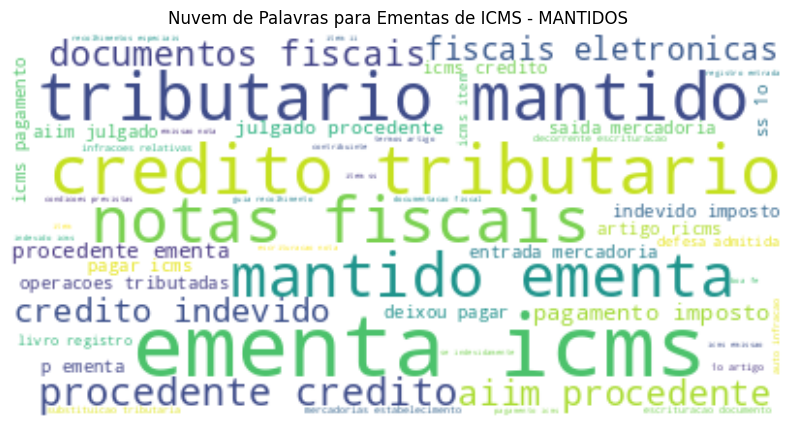

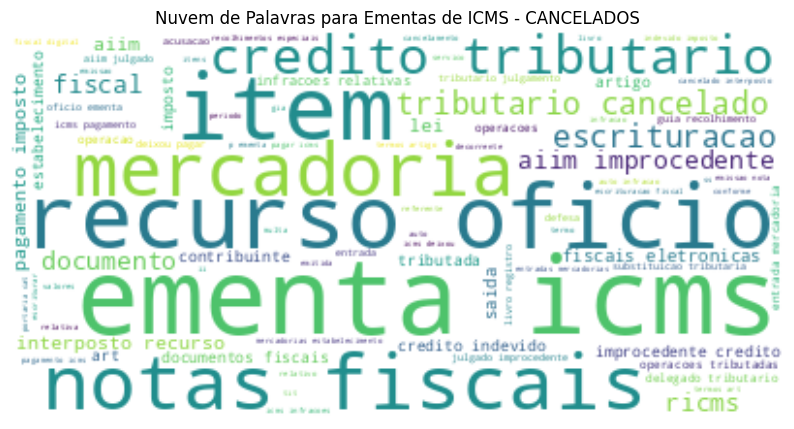

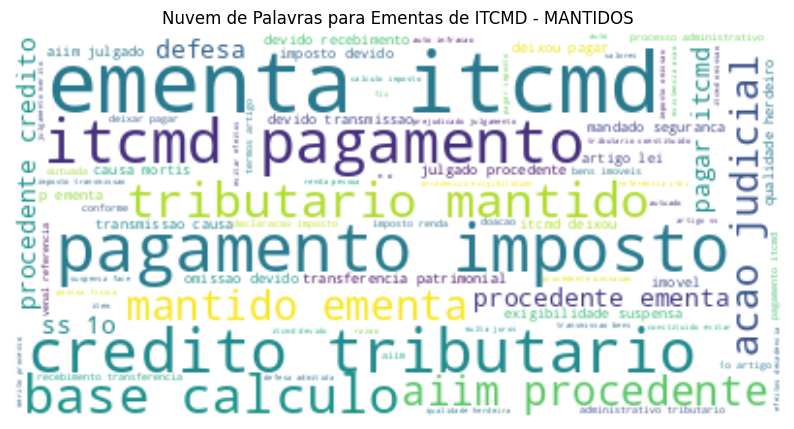

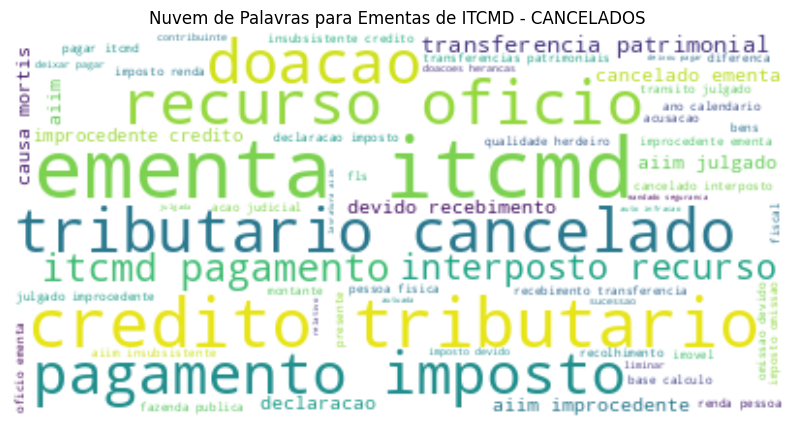

In [71]:
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS', lematizado=False)

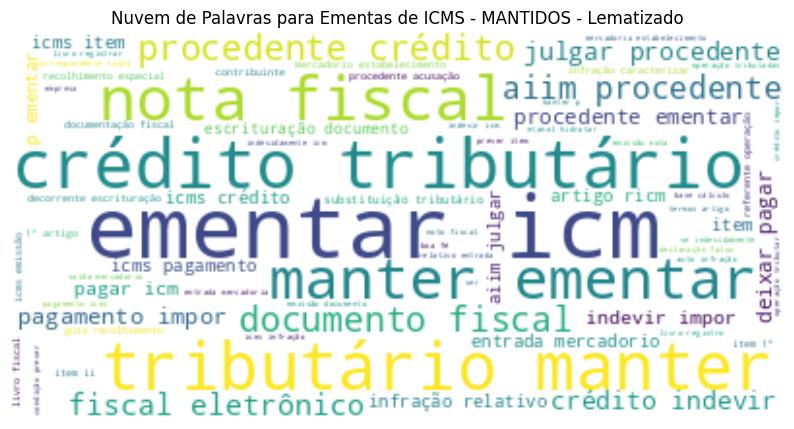

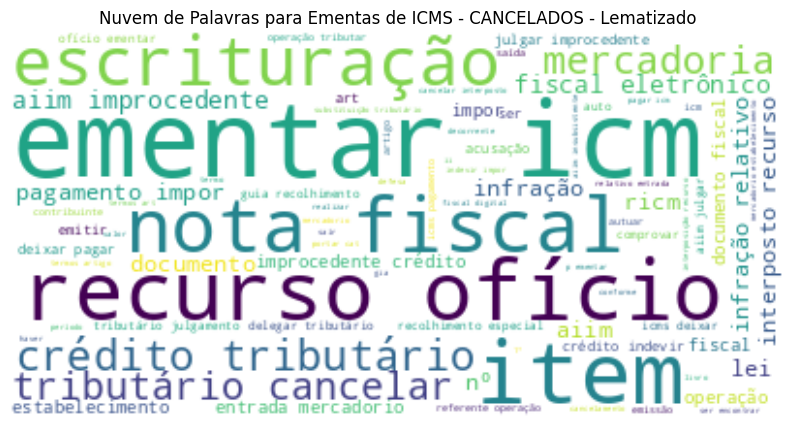

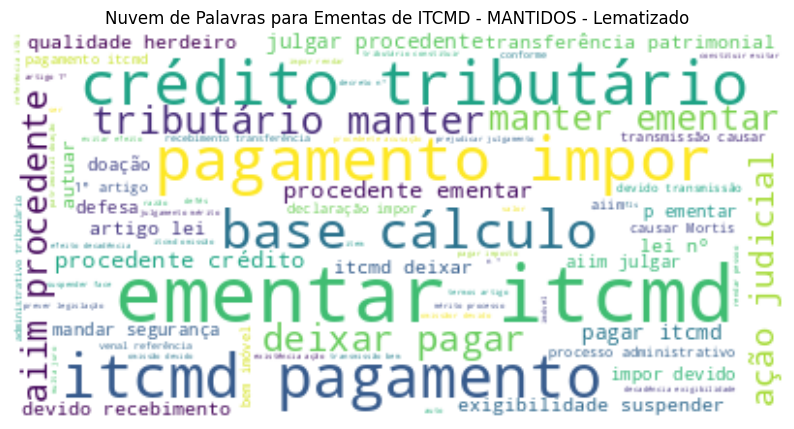

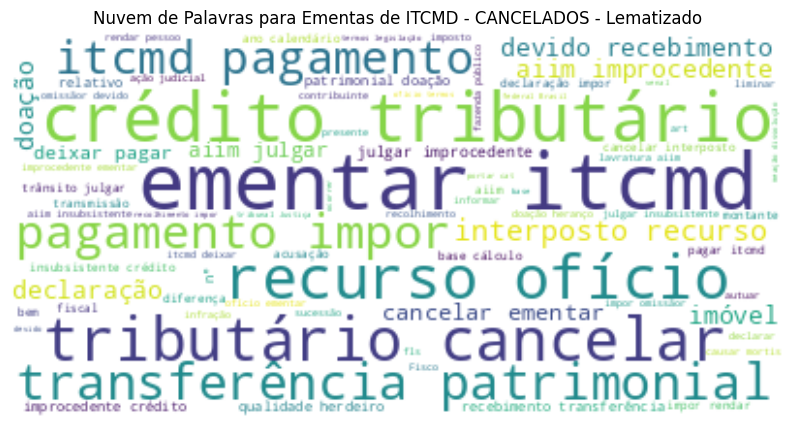

In [72]:
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS', lematizado=True)

## 🔠 WordClouds - Algumas conclusões
  - Nas primeiras 4 nuvens de palavras, foram utilizadas as mesmas sem acentuação, porque há alguns erros de digitação na origem, como já explicado (ex: 'crédito' e 'credito')
  - No grupo seguinte de 4 nuvens de palavras, foi mantida a acentuação, mas foram feitas com as palavras lematizadas
  - A princípio, no exemplo acima a lematização para nuvem de palavras não se mostrou útil. Esperava-se uma maior concentração de palavras mais frequentes, mas neste caso prático específico acabou causando um pouco de confusão na redução das palavras à sua raiz, ou forma básica.
  - Neste início de definição de variáveis preditoras, podemos, a título de teste, destacar algumas palavras que podem ajudar ao aprendizado de máquina, conforme código um pouco mais abaixo (dataframes df_em_ml1 e df_em_ml1_b). São elas:
    - icms -> tributo 'ICMS'
    - mercadoria -> tributo 'ICMS'
    - notas fiscais -> tributo 'ICMS'
    - credito indevido -> tributo 'ICMS'
    - operacoes -> tributo 'ICMS'
    - itcmd -> tributo 'ITCMD'
    - doação -> tributo 'ITCMD'
    - mantido -> julgamento 'MANTIDO'
    - procedente -> julgamento 'MANTIDO'
    - improcedente -> julgamento 'CANCELADO'
    - cancelado -> julgamento 'CANCELADO'
    - recurso -> julgamento 'CANCELADO'
  - Em 'rodada CRISP', inserimos também:
    - credito imposto -> tributo 'ICMS'
    - creditou -> tributo 'ICMS'
    - cupons fiscais -> tributo 'ICMS'
    - documentos fiscais -> tributo 'ICMS'

  - Antes vamos novamente gerar WordClouds, mas para o dataframe balanceado de ementas (df_ementas_balanc), sem lematização. Observa-se razoável diferença em relação ao não balanceado.



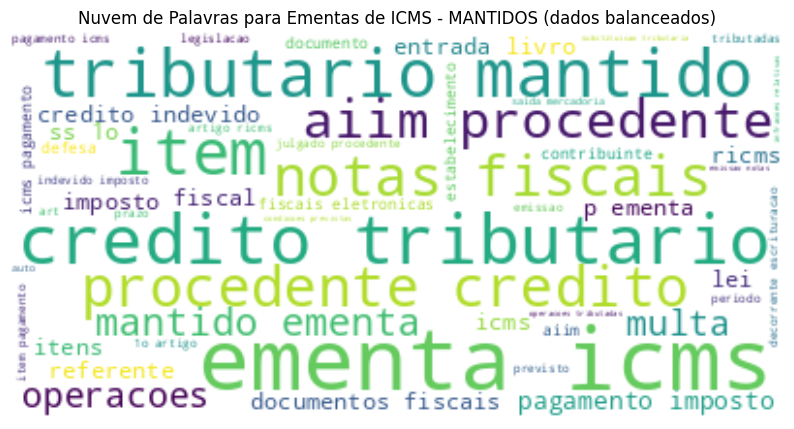

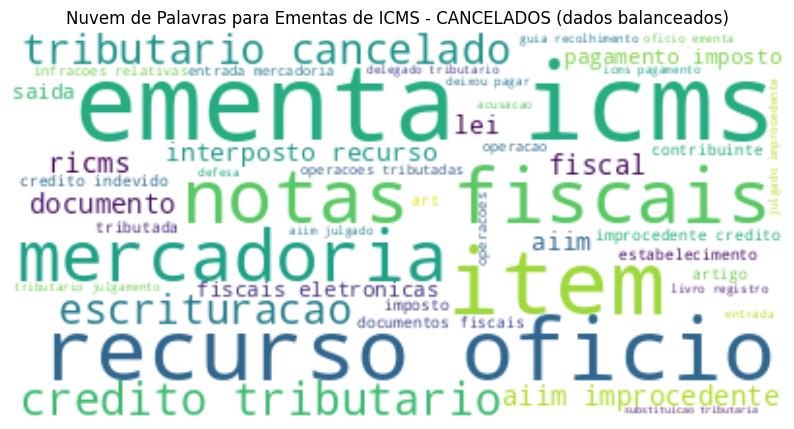

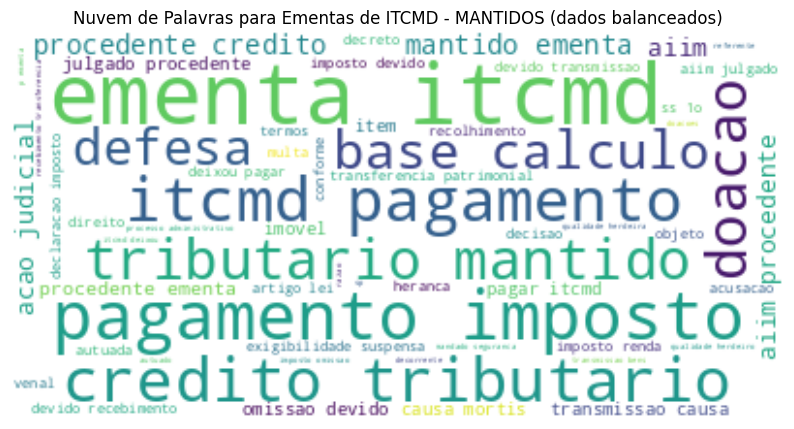

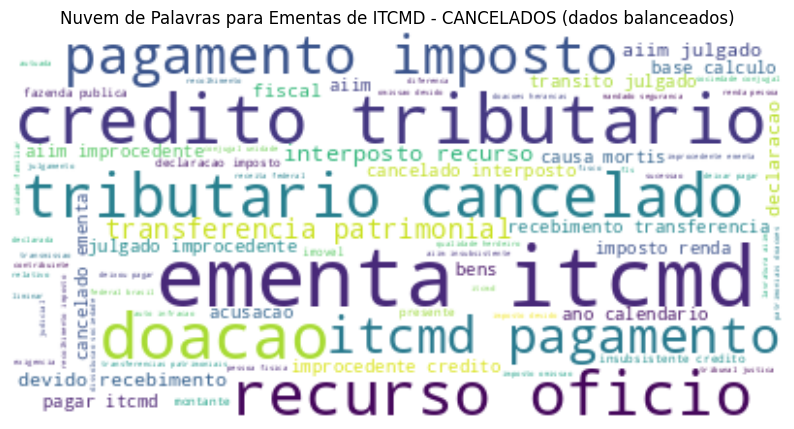

In [73]:
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ICMS') & (df_ementas_balanc['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ICMS') & (df_ementas_balanc['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ITCMD') & (df_ementas_balanc['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ITCMD') & (df_ementas_balanc['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS (dados balanceados)', lematizado=False)

In [76]:
# Criação do primeiro Dataframe de Ementas de Machine Learning (df_em_ml1), na versão normal e balanceada (_b)
df_em_ml1 = df_ementas[['julgado', 'imposto', 'ementa_no_sw_p_a', 'num_palavras', 'num_caracteres']].copy()
df_em_ml1_b = df_ementas_balanc[['julgado', 'imposto', 'ementa_no_sw_p_a', 'num_palavras', 'num_caracteres']].copy()
# Foram também inseridos os campos de testes das palavras chave acima descritas
palavras_chave = ['icms', 'mercadoria', 'notas fiscais', 'credito indevido', 'operacoes',
                  'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais',
                  'itcmd', 'doacao', 'mortis',
                  'mantido', 'procedente', 'improcedente', 'cancelado', 'recurso']
for palavra in palavras_chave:
    # atenção! Nas linhas abaixo foi inserido um espaço antes porque 'procedente' estava trazendo também 'improcedente'
    # Houve um ganho significativo de acurária na variável 'procedente', de 0,56 para 0,81
    # Quanto às demais preditoras, não se verificaram perdar ao se inserir espaço,
    #   exceto uma pequena diminuição de 'credito indevido' de 0,69 para 0,67
    df_em_ml1.loc[:, palavra] = df_ementas['ementa_no_sw_p_a'].str.contains(' ' + palavra)
    df_em_ml1_b.loc[:, palavra] = df_ementas_balanc['ementa_no_sw_p_a'].str.contains(' ' + palavra)

with pd.ExcelWriter(os.path.join(config['VAR_DIR'], 'df_em_ml1.xlsx')) as writer:
    df_em_ml1.to_excel(writer, sheet_name='df_em_ml1')
    df_em_ml1_b.to_excel(writer, sheet_name='df_em_ml1_b')
display(HTML("<h3>Também gerado, com sucesso, o arquivo excel 'df_em_ml1.xlsx' com os dataframes df_em_ml1 e df_em_ml1_b (balanceado)"
             + f" na pasta {config['VAR_DIR']}</h3>"))

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['num_palavras', 'num_caracteres'] + palavras_chave
X = df_em_ml1[features]
y_julgado = df_em_ml1['julgado']
y_imposto = df_em_ml1['imposto']

def ml_rf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Treinando um modelo de floresta aleatória para o target
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

display(HTML("<h2>Parte 1 - Dados Desbalanceados</h2>"))
display(HTML(f"<h3>Teste 1: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

features2 = [item for item in features if item not in ['icms', 'itcmd']]
X = df_em_ml1[features2]
display(HTML(f"<h3>Teste 2: RandomForest com a seguintes variáveis preditoras: <br>{features2}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

features3 = ['num_palavras', 'num_caracteres']
X = df_em_ml1[features3]
display(HTML(f"<h3>Teste 3: RandomForest com a seguintes variáveis preditoras: <br>{features3}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

features = ['num_palavras', 'num_caracteres'] + palavras_chave
X = df_em_ml1_b[features]
y_julgado = df_em_ml1_b['julgado']
y_imposto = df_em_ml1_b['imposto']

display(HTML("<h2>Parte 2 - Dados Balanceados</h2>"))
display(HTML(f"<h3>Teste 1: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

features2 = [item for item in features if item not in ['icms', 'itcmd']]
X = df_em_ml1_b[features2]
display(HTML(f"<h3>Teste 2: RandomForest com a seguintes variáveis preditoras: <br>{features2}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

features3 = ['num_palavras', 'num_caracteres']
X = df_em_ml1_b[features3]
display(HTML(f"<h3>Teste 3: RandomForest com a seguintes variáveis preditoras: <br>{features3}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))


## 💡 Aprendizado de máquina (1)

Conforme se verifica acima:
  - As variáveis preditoras 'icms' e 'itcmd' são indicadores evidentes do target 'imposto', logo qualquer método de aprendizado de máquina resultará em acurácia próxima de 100%. Assim, essas variáveis foram retirada no teste2 em diante
  - Veja que as variáveis 'num_palavras' e 'num_caracteres' são muito pouco relevantes para a predição dos targets. Observa-se que na Parte 1 os valores de 0,91 e 0,84 não correspondem ao aprendizado de máquina, refletindo basicamente o desbalanceamento dos dados, que possuem muito mais 'julgado' = MANTIDO e imposto = 'ICMS'
  - Logo, continuaremos com aprendizado de máquina apenas para dados balanceados
  - Por fim, verificando o Teste 2 da Parte 2, temos que o simples teste (Verdadeiro ou Falso) das palavras  'mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao' e 'mortis' auxilia no target 'imposto', enquanto 'mantido', 'procedente', 'improcedente', 'cancelado' e 'recurso' auxiliam na predição de 'julgado', conforme código a seguir:

In [78]:
def ml1_pt3(df_em_ml1_b, features):
    X = df_em_ml1_b[features]
    y_julgado = df_em_ml1_b['julgado']
    y_imposto = df_em_ml1_b['imposto']
    display(HTML(f"<h3>Teste: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
                 + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado))}<br>"
                 + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto))}</h3>"))

display(HTML("<h2>Parte 3a - Dados Balanceados - Testes com as variáveis preditores isoladamente</h2>"))
ml1_pt3(df_em_ml1_b, ['num_palavras'])
ml1_pt3(df_em_ml1_b, ['num_caracteres'])
ml1_pt3(df_em_ml1_b, ['mercadoria'])
ml1_pt3(df_em_ml1_b, ['notas fiscais'])
ml1_pt3(df_em_ml1_b, ['credito indevido'])
ml1_pt3(df_em_ml1_b, ['operacoes'])
ml1_pt3(df_em_ml1_b, ['doacao'])
ml1_pt3(df_em_ml1_b, ['mortis'])
ml1_pt3(df_em_ml1_b, ['credito imposto'])
ml1_pt3(df_em_ml1_b, ['creditou'])
ml1_pt3(df_em_ml1_b, ['cupons fiscais'])
ml1_pt3(df_em_ml1_b, ['documentos fiscais'])
ml1_pt3(df_em_ml1_b, ['mantido'])
ml1_pt3(df_em_ml1_b, ['procedente'])
ml1_pt3(df_em_ml1_b, ['improcedente'])
ml1_pt3(df_em_ml1_b, ['cancelado'])
ml1_pt3(df_em_ml1_b, ['recurso'])

display(HTML("<h2>Parte 3b - Dados Balanceados - Testes com as variáveis preditores em conjunto, melhor score para 'julgado' e 'imnposto'</h2>"))
ml1_pt3(df_em_ml1_b, ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
                      'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais'])
ml1_pt3(df_em_ml1_b, [ 'mantido', 'procedente', 'improcedente', 'cancelado', 'recurso'])


- Os últimos 5 testes da Parte 3a mostraram que as preditoras tem relevância para 'julgado', enquanto as demais mostram relevância para 'imposto'
- Os campos 'num_palavras' e 'num_caracteres' mostraram relevância quase inexistente em 'imposto' e muita pouca relevância em 'julgado'
- abaixo, vamos mostrar a árvore, de acordo com as variáveis relevante para cada target, conforme vários testes, cujo resultado final é a Parte 3b acima

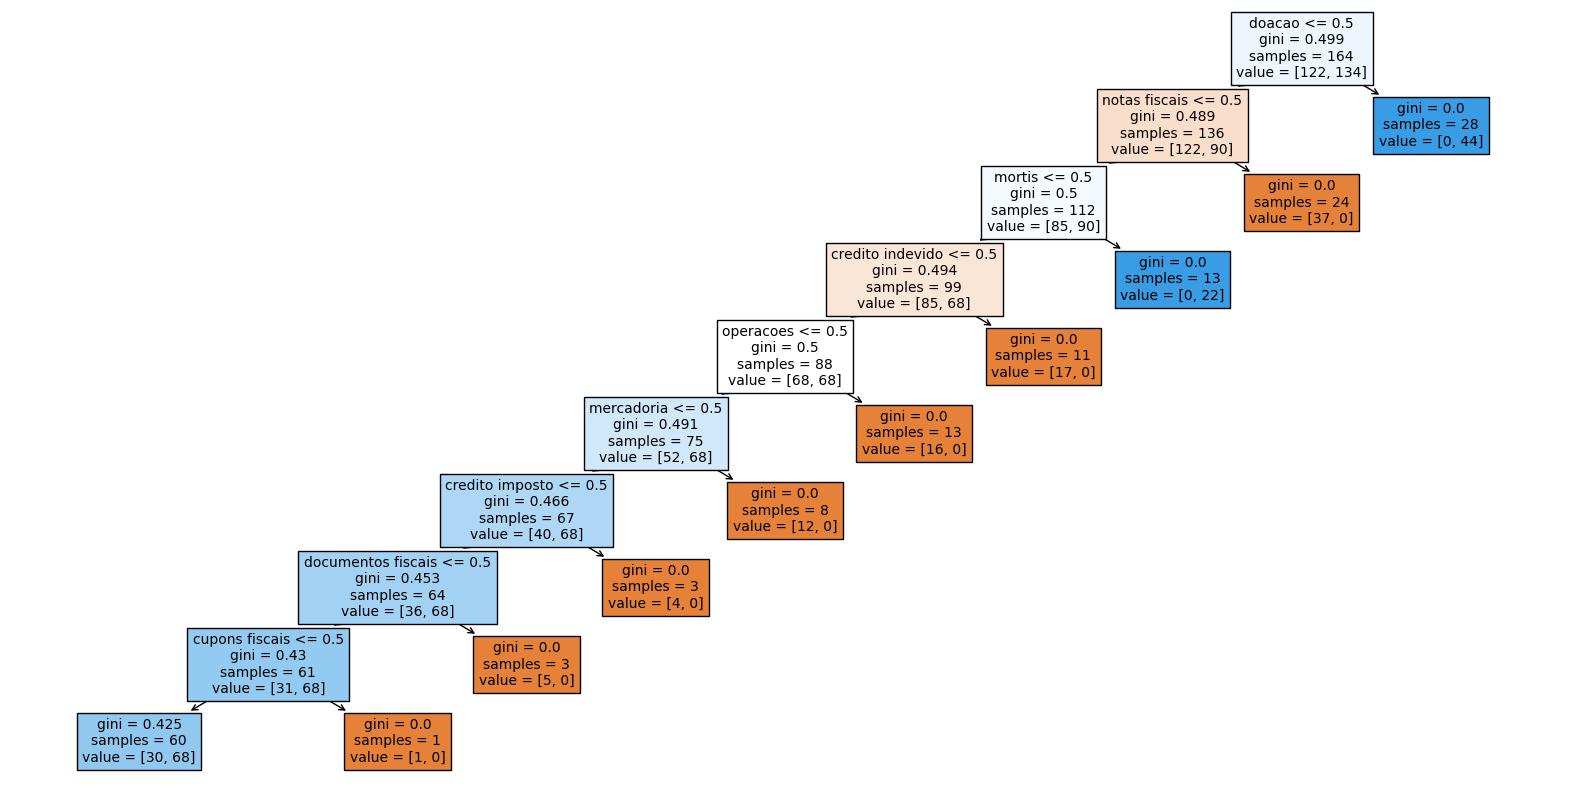

None

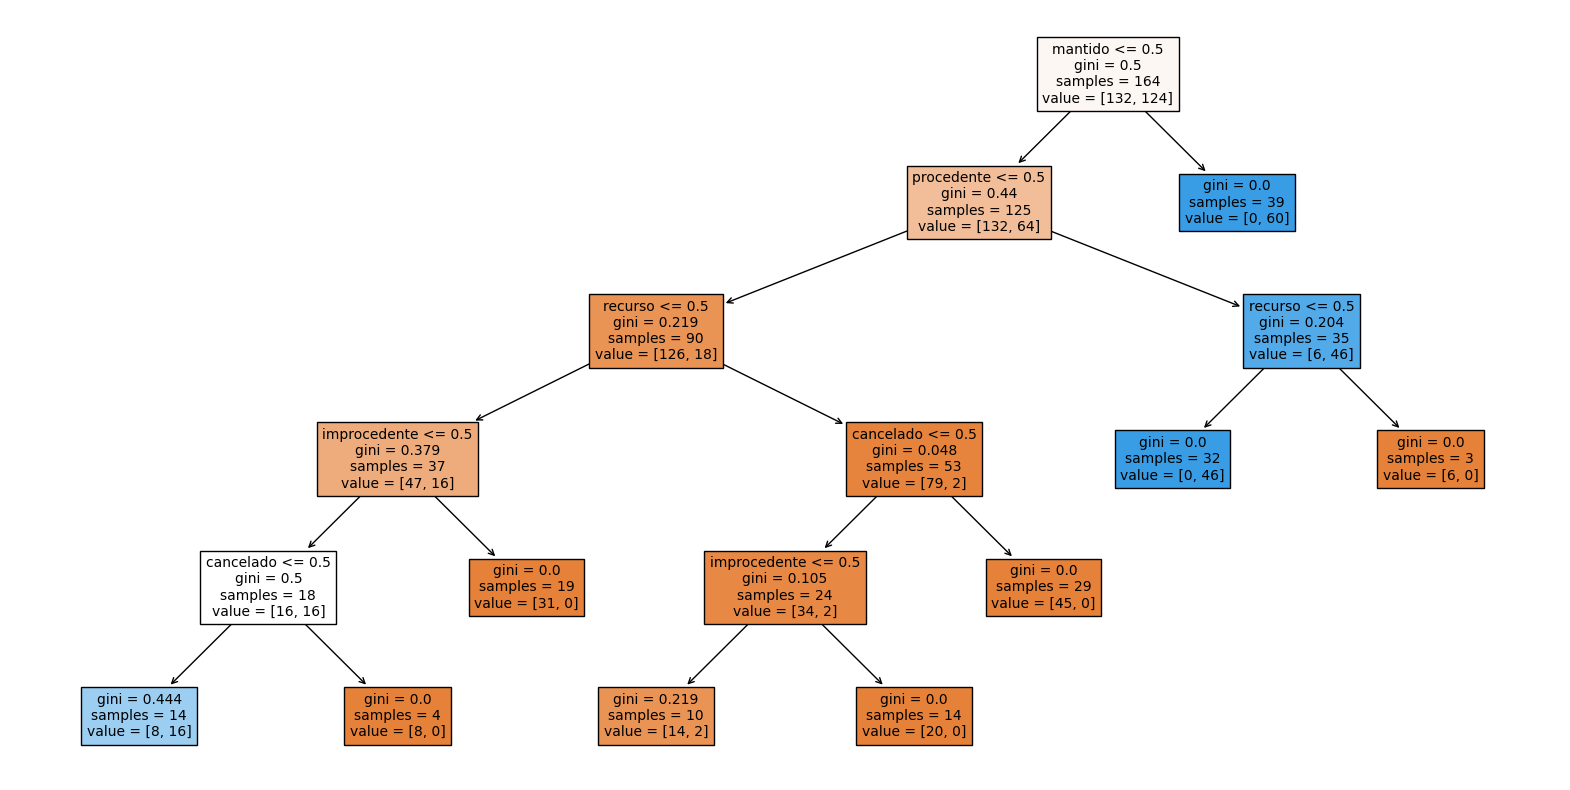

None

In [109]:
from sklearn.tree import plot_tree

def combina_dataframe_X_y(X_train, X_test, y_train, y_test, y_pred):
    # Criando as colunas 'origem'
    origem_train = pd.Series(['treino'] * X_train.shape[0], index=X_train.index)
    origem_test = pd.Series(['teste'] * X_test.shape[0], index=X_test.index)
    origem_combined = pd.concat([origem_train, origem_test])
    # Juntando os dados de treino e teste
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    # Para o conjunto de teste, faça a previsão. Para o conjunto de treino, você já sabe que a predição é correta.
    y_pred_train = y_train.copy() # Para os dados de treino, considere a própria y_train como a "predição", já que foi usado para treinar
    y_pred_combined = pd.concat([y_pred_train, pd.Series(y_pred, index=y_test.index)])
    # Criando o dataframe com as colunas desejadas
    df_combined = X_combined.copy()
    df_combined.insert(0, 'origem', origem_combined)  # Insere a coluna 'origem' na primeira posição
    df_combined['y_real'] = y_combined
    df_combined['y_pred'] = y_pred_combined
    # 3. Criando a coluna 'status' comparando as predições com os valores reais
    df_combined['status'] = ['Acerto' if real == pred else 'Erro' for real, pred in zip(df_combined['y_real'], df_combined['y_pred'])]
    return df_combined

def plota_arvore_retorna_df_combinado(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tree = clf.estimators_[0]
    plt.figure(figsize=(20,10))
    plot_tree(tree, filled=True, feature_names=features, max_depth=10, fontsize=10)
    display(HTML(f"<h3>Árvore RandomForest - preditoras {features} - target 'imposto' - Acurácia {two_dec_f(accuracy*100)}%</h3>"))
    display(plt.show())
    df_combinado = combina_dataframe_X_y(X_train, X_test, y_train, y_test, y_pred);
    return df_combinado

features = ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais']
df_combinado1 = plota_arvore_retorna_df_combinado(df_em_ml1_b, features, 'imposto')
df_combinado1 = df_combinado1.join(df_em_ml1_b['ementa_no_sw_p_a'])
features = ['mantido', 'procedente', 'cancelado', 'improcedente', 'recurso']
df_combinado2 = plota_arvore_retorna_df_combinado(df_em_ml1_b, features, 'julgado')
df_combinado2 = df_combinado2.join(df_em_ml1_b['ementa_no_sw_p_a'])

with pd.ExcelWriter(os.path.join(config['VAR_DIR'], 'df_em_ml1_rf.xlsx')) as writer:
    df_combinado1.to_excel(writer, sheet_name='df_combinado1')
    df_combinado2.to_excel(writer, sheet_name='df_combinado2')
display(HTML("<h3>Também gerado, com sucesso, o arquivo excel 'df_em_ml1_rf.xlsx' com os dataframes df_combinado1 e df_combinado2"
             + f" na pasta {config['VAR_DIR']}</h3>"))


## 💡 Aprendizado de máquina (2)

- São facilmente verificáveis algumas causas de erros nas previsões, abrindo o arquivo excel 'df_em_ml1_rf.xlsx' e filtrando onde a coluna status = 'Erro'.
- Alguns exemplos da comparação dos dados da planilha com as decisões em .pdf:
  - O <a href="https://www.pmarote.net/tcc/cweb/www/4126071voto4823385.pdf" target="_blank">AIIM 4.126.071-5</a> é na verdade parcialmente procedente e parcialmente improcedente, apesar de constar como <a href="https://www.pmarote.net/tcc/cweb/www/4126071.html" target="_blank">Julgamento: MANTIDO o AIIM</a> no movimento de 30/10/2019.
  - O <a href="https://www.pmarote.net/tcc/cweb/www/4126967voto4844234.pdf" target="_blank">AIIM 4.126.967-6</a> é na verdade parcialmente procedente, apesar de constar como <a href="https://www.pmarote.net/tcc/cweb/www/4126967.html" target="_blank">Julgamento: CANCELADO o AIIM</a> no movimento de 30/12/2020.
  - Alguns AIIMs são relativos a temas específicos, com amostra pequena ou até unitária, como <a href="https://www.pmarote.net/tcc/cweb/www/4122744voto4820478.pdf" target="_blank">4.122.744-0 (índices de energia elétrica)</a> e <a href="https://www.pmarote.net/tcc/cweb/www/4121973voto4822033.pdf" target="_blank">4.121.973-9 (transferência de crédito acumulado)</a>, o que dificulta a detecção por palavras chaves específicas, especialmente no âmbito de profundidade deste TCC
  - Em um desenvolvimento que também foge ao escopo deste TCC, seria possível criar novos tipos de detecção de termos, como por exemplo 'credito' que não seja 'credito tributario', porque 'crédito tributário' se refere a aos dois impostos, enquanto outros tipos de termos como 'credito imposto' ou 'credito indevido' são típicos de ICMS
- A seguir, com base nas features e targets acima, comparações entre vários algoritmos de classificação do scikit-learn:

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Importando os algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Supondo que você já tenha o dataframe chamado 'df_em_ml1_b':
X = df_em_ml1_b[['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais']]
y = df_em_ml1_b['imposto']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista com os algoritmos a serem testados
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Comparando os algoritmos
results = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[key] = accuracy
    print(key)
    print(classification_report(y_test, y_pred))
    print("-"*60)

# Exibindo o algoritmo com a maior acurácia
best_classifier = max(results, key=results.get)
print(f"Melhor classificador: {best_classifier} com acurácia de {results[best_classifier]*100:.2f}%")


Logistic Regression
              precision    recall  f1-score   support

        ICMS       1.00      0.83      0.91        30
       ITCMD       0.87      1.00      0.93        34

    accuracy                           0.92        64
   macro avg       0.94      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64

------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

        ICMS       1.00      0.83      0.91        30
       ITCMD       0.87      1.00      0.93        34

    accuracy                           0.92        64
   macro avg       0.94      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64

------------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

        ICMS       1.00      0.83      0.91        30
       ITCMD       0.87      1.00      0.93        34

    accu

- Os vários algoritmos de classificação do scikit-learn deram resultados praticamente iguais, com um leve decréstimo em KNN
- A seguir, vamos fazer alguns estudos com base na Regressão Logística, cujos resultados coincidem com Floresta Aleatória

In [114]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
display(HTML(f"<h3>Acurácia do Modelo de Regressão Logísitica: {two_dec_f(accuracy_score(y_test, y_pred)*100)}%<h3>"))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ICMS       1.00      0.83      0.91        30
       ITCMD       0.87      1.00      0.93        34

    accuracy                           0.92        64
   macro avg       0.94      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64



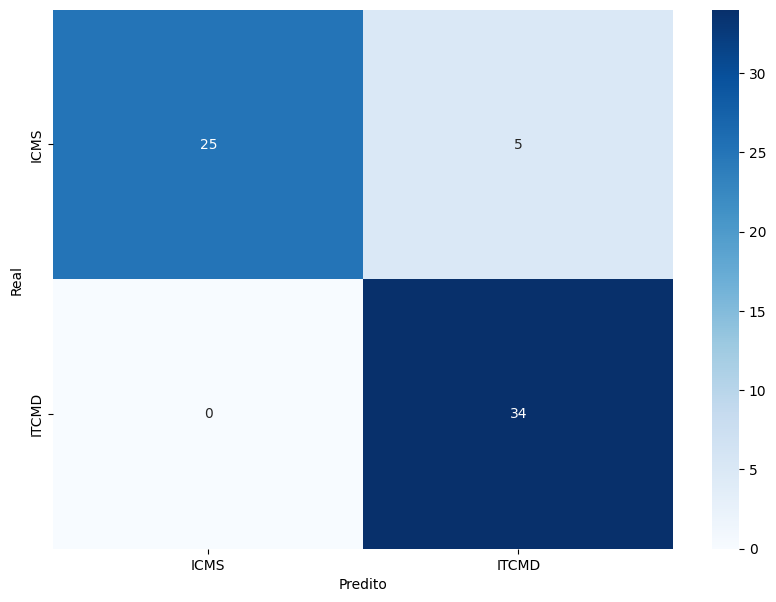

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
labels = ['ICMS', 'ITCMD']
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
display(HTML(f'<h2>Matriz de Confusão</h2><h3>Observa-se que:<br>'
             + "- 25 (Verdadeiro Positivo para ICMS): O modelo previu corretamente que 25 observações são da classe 'ICMS'<br>"
             + "- 5 (Falso Negativo para ICMS): O modelo previu incorretamente que 5 observações são da classe 'ITCMD' quando na verdade são 'ICMS'<br>"
             + "- 0 (Falso Negativo para ITCMD): Não houve previsão incorreta da classe 'ITCMD'<br>"
             + "- 34 (Verdadeiro Positivo para ITCMD): O modelo previu corretamente que 34 observações são da classe 'TICMD'<br>"
             + "</h3>"))
plt.show()


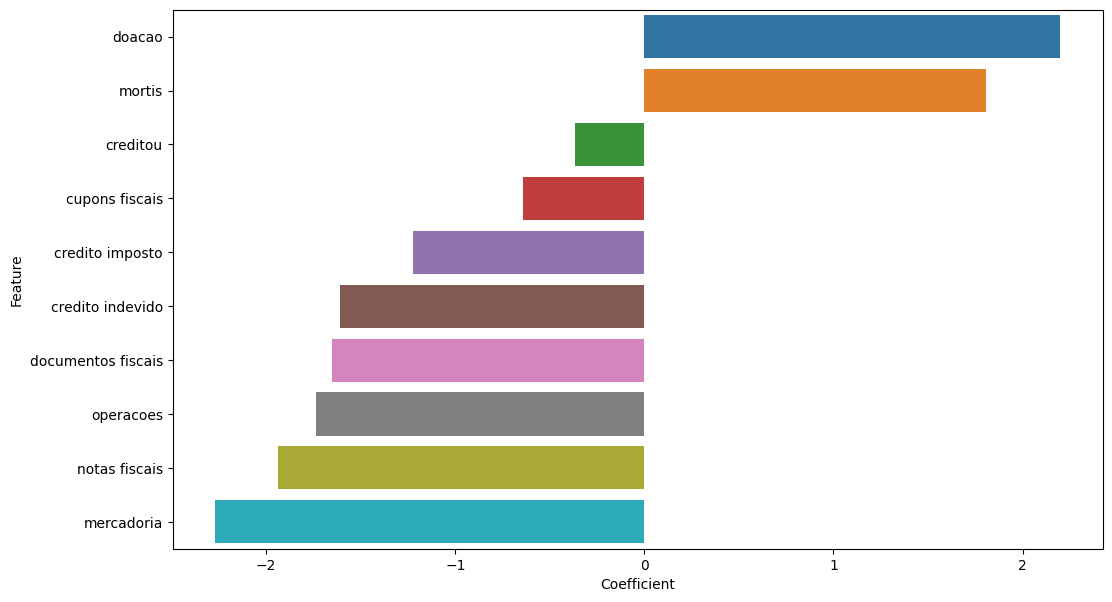

None

In [116]:
feature_names = X.columns
coefficients = lr_model.coef_[0]

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
display(HTML(f'<h2>Coeficientes da Regressão Logística</h2><h3>Observa-se que:<br>'
             + "- 'doacao' é variável preditora (feature) que mais influenciou para a variável de resposta 'imposto' = 'ITCMD'<br>"
             + "- 'mercadoria' é variável preditora (feature) que mais influenciou para a variável de resposta 'imposto' = 'ICMS'</h3>"))
display(plt.show())


In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix


In [120]:
# Suponha que df é o dataframe 'df_em_ml1_b' fornecido
features = ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais']

X = df_em_ml1_b[features].values
y = df_em_ml1_b['imposto'].values

# Codificar o target y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [121]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid para classificação binária

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [122]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 0.6184 - accuracy: 0.6328 - val_loss: 0.5011 - val_accuracy: 0.9219
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8867 - val_loss: 0.3712 - val_accuracy: 0.9219
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8867 - val_loss: 0.2886 - val_accuracy: 0.9219
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8867 - val_loss: 0.2508 - val_accuracy: 0.9219
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.8867 - val_loss: 0.2310 - val_accuracy: 0.9219
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.8867 - val_loss: 0.2254 - val_accuracy: 0.9219
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.8867 - val_loss: 0.2256 - val_accuracy: 0.9219
Epoch 8/100


In [123]:
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

        ICMS       1.00      0.83      0.91        30
       ITCMD       0.87      1.00      0.93        34

    accuracy                           0.92        64
   macro avg       0.94      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64

[[25  5]
 [ 0 34]]


A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que pode ser aplicada a dados numéricos. Para aplicar PCA aos tokens, você primeiro precisa converter os tokens em representações numéricas. Uma maneira comum de fazer isso é usando a técnica TF-IDF (Term Frequency-Inverse Document Frequency) ou embeddings de palavras, como Word2Vec.

Passos Gerais:
Converter Tokens em Vetores Numéricos: Converta os tokens em representações numéricas (TF-IDF, Word2Vec).
Aplicar PCA: Reduza a dimensionalidade dos vetores numéricos usando PCA.
Visualizar os Resultados: Plote os componentes principais para visualizar agrupamentos ou padrões nos dados.

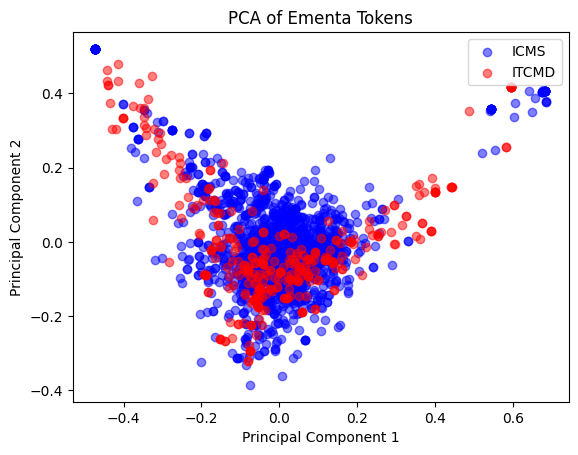

None

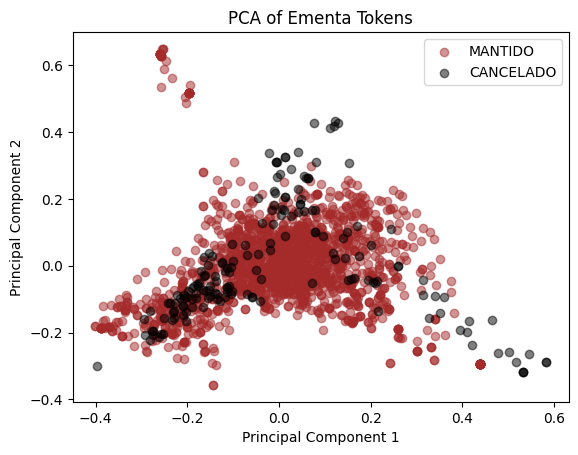

None

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def analise_pca(df, label, color):
    # Inicializar o vetorizador TF-IDF
    vectorizer = TfidfVectorizer()
    # Fit e transformar as strings de ementa para matriz TF-IDF
    X_tfidf = vectorizer.fit_transform(df['ementa_lematizada'])
    # Inicializar o objeto PCA e especificar o número de componentes principais
    pca = PCA(n_components=2)
    # Fit e transformar a matriz TF-IDF
    X_pca = pca.fit_transform(X_tfidf.toarray())
    # Plotar os componentes principais com a cor e a label específicas
    plt.scatter(X_pca[:, 0], X_pca[:, 1], color=color, alpha=0.5, label=label)


analise_pca(df_ementas[df_ementas['target2'] == 'ICMS'], 'ICMS', 'b')
analise_pca(df_ementas[df_ementas['target2'] == 'ITCMD'], 'ITCMD', 'r')
# Adicionar a legenda, título e mostrar o gráfico
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Ementa Tokens')
plt.legend(loc='upper right')
display(plt.show())

analise_pca(df_ementas[df_ementas['target1'] == 'MANTIDO'], 'MANTIDO', 'brown')
analise_pca(df_ementas[df_ementas['target1'] == 'CANCELADO'], 'CANCELADO', 'black')
# Adicionar a legenda, título e mostrar o gráfico
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Ementa Tokens')
plt.legend(loc='upper right')
display(plt.show())

In [ ]:
analise_pca(df_ementas_balanc[df_ementas_balanc['target2'] == 'ICMS'], 'ICMS', 'b')
analise_pca(df_ementas_balanc[df_ementas_balanc['target2'] == 'ITCMD'], 'ITCMD', 'r')
# Adicionar a legenda, título e mostrar o gráfico
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Ementa Tokens (df_ementas_balanc)')
plt.legend(loc='upper right')
display(plt.show())

analise_pca(df_ementas_balanc[df_ementas_balanc['target1'] == 'MANTIDO'], 'MANTIDO', 'brown')
analise_pca(df_ementas_balanc[df_ementas_balanc['target1'] == 'CANCELADO'], 'CANCELADO', 'black')
# Adicionar a legenda, título e mostrar o gráfico
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Ementa Tokens (df_ementas_balanc)')
plt.legend(loc='upper right')
display(plt.show())

KeyError: ignored

Este código irá plotar cada documento no espaço bidimensional definido pelos dois primeiros componentes principais.

Observação:
A análise de PCA pode revelar estruturas interessantes nos dados, mas interpretar essas estruturas pode ser um desafio, especialmente em dados de texto.
Se você tem classes ou categorias conhecidas nos seus dados, você pode colorir os pontos no gráfico de dispersão de acordo com essas classes para ver se o PCA revela algum padrão interessante ou separação entre as classes.
Para análise de texto, muitas vezes técnicas mais avançadas como t-SNE ou UMAP juntamente com embeddings de palavras oferecem visualizações mais informativas.

## Metodologias - Planejamentos - Objetivos <span class="label label-info"> 🚧 Em construção </span>

- Objetivos:
  - Discutir sobre o uso de Processamento de Linguagem Natural (PLN) para classificação das decisões
- Transformação e Tokenização:
  - Utilizar transformação e tokenização, transformando em números, para o modelo entender as relações entre eles. Ou seja, desenvolver uma forma em que o modelo possa interpretar.
- Modelos e Treinamento:
  - Discutir o treinamento de diferentes modelos, começando do mais simples ao mais complexo, para encontrar um equilíbrio entre precisão e complexidade. Exemplos: verificar a performance (acurácia) de modelos como KNN, Naive Bayes, etc
  - Estudar o modelo LSTM (Long Short-Term Memory), que tem sido bastante destacado por suas capacidades em processar linguagem natural, lidar com diferentes tamanhos de entrada, e ser combinado com outros modelos para tarefas como tradução de texto.
  - Estudar também outras bibliotecas de processamento de linguagem natural e modelos de aprendizado de máquina, como TF-IDF e Word2Vec.
- Avaliação e Otimização:
  - Discutir o processo de otimização dos modelos, a importância de evitar o overfitting, e como os modelos foram avaliados.
- Implementação e Deploy:
  - O deploy do modelo e a importância de salvar tanto o modelo quanto o tokenizador devem ser discutidos, buscando também manter a consistência no tratamento dos dados.
- Finalização:
  - Detacar a relevância do NLP na atualidade , encontrar uma linha entre otimização e resultado.

## 💡 Cursos e Links<a href="#top"><span style="float: right;">🔝</span></a><a id="links"></a>

#### Links para Guardar:

  [Top 25 Bibliotecas Python Para Data Science](https://blog.dsacademy.com.br/top-25-bibliotecas-python-para-data_science/)

  [Full Emoji List](https://unicode.org/emoji/charts/full-emoji-list.html)

  [Private GPT](https://www.youtube.com/watch?v=jxSPx1bfl2M)

  [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/README.md)
  
  [Dicas Formatação Jupyter Notebook e Markdown](https://brains.dev/2022/jupyter-notebooks-dicas-de-formatacao/)
  
  [Pandas Comparison with spreadsheets](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_spreadsheets.html#compare-with-spreadsheets)

  [Python Scripts to Automate Routine - Tem wikipedia, text to speech, pytube, PyPDF2, Python Imaging Library, gensim (para resumir textos), pywhatkit](https://www.youtube.com/watch?v=700s0pzjPhM)
  
  [Automate Excel Reporting Using Python (Real-Life-Example) | Pandas, Plotly, Xlwings Tutorial](https://www.youtube.com/watch?v=JoonRjMsSdY)

### Best Machine Learning &amp; Deep Learning Courses [2019]


[1. Machine Learning Certification by Stanford University (Coursera)](https://www.coursera.org/learn/machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-ajzPQo.U8IJDvdN2zJ4zsg&amp;siteID=vedj0cWlu2Y-ajzPQo.U8IJDvdN2zJ4zsg&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[2. Deep Learning Certification by deeplearning.ai (Coursera)](https://www.coursera.org/specializations/deep-learning?edocomorp=mar19affiliate20off&amp;ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-ETlb9CJE2XM9JpTjEFCAhQ&amp;siteID=vedj0cWlu2Y-ETlb9CJE2XM9JpTjEFCAhQ&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[3. Intro to Machine Learning Nanodegree Program (Udacity)](https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229?cjevent=3f802ef9d42d11e983bf02e70a240613)

[4. Machine Learning A-Z™: Hands-On Python &amp; R In Data Science (Udemy)](https://www.udemy.com/machinelearning/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Ocm.SbF0Nfu1joTCmj2lcw&amp;LSNPUBID=vedj0cWlu2Y)

[5. Machine Learning Data Science Course from Harvard University (edX)](https://www.edx.org/professional-certificate/harvardx-data-science?source=aw&amp;awc=6798_1568162694_f3d200d33df1e9f4c007eab412be2dc9&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[6. Deep Learning Course by IBM (edX)](https://www.edx.org/professional-certificate/ibm-deep-learning?source=aw&amp;awc=6798_1568162738_1040cabaa57d2f05641cb016f73b28e1&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[7. Mathematics for Machine Learning by Imperial College London (Coursera)](https://www.coursera.org/specializations/mathematics-machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-xLidZLlpjC8Gv_s2W4ZnVw&amp;siteID=vedj0cWlu2Y-xLidZLlpjC8Gv_s2W4ZnVw&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[8. Machine Learning – Artificial Intelligence by Columbia University (edX)](https://www.edx.org/micromasters/columbiax-artificial-intelligence?source=aw&amp;awc=6798_1568162785_8665fc7be3791239252b43c78fc25d47&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[9. Free College Machine Learning Courses (edX)](https://www.edx.org/learn/machine-learning?source=aw&amp;awc=6798_1568162807_f9cb6b1e897a5e949c8f61b160df08fb&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[10. Machine Learning &amp; AI Courses (fast.ai)](https://www.fast.ai/)

[11. Advanced Machine Learning Course by HSE (Coursera)](https://www.coursera.org/specializations/aml?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-e8Umkx_VMoYhoLYF2JIiLA&amp;siteID=vedj0cWlu2Y-e8Umkx_VMoYhoLYF2JIiLA&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[12. Python for Data Science and Machine Learning Bootcamp (Udemy)](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-2yZi8gUVywIuAglcc34W9Q&amp;LSNPUBID=vedj0cWlu2Y)

[13. Deep Learning A-Z™: Hands-On Artificial Neural Networks (Udemy)](https://www.udemy.com/deeplearning/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-XBUM5R9N4AO.GHduAzNNpg&amp;LSNPUBID=vedj0cWlu2Y)

[14. Python for Everybody by University of Michigan (Coursera)](https://www.coursera.org/specializations/python?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Lc2RCZhix6fikqVzdQwKiw&amp;siteID=vedj0cWlu2Y-Lc2RCZhix6fikqVzdQwKiw&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[15. Deep Learning in Python (DataCamp)](https://www.datacamp.com/courses/deep-learning-in-python?tap_a=5644-dce66f&amp;tap_s=463826-784532)

[16. Machine Learning Certification by University of Washington (Coursera)](https://www.coursera.org/specializations/machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Cn0Cca6uS1hGwdb17rhacQ&amp;siteID=vedj0cWlu2Y-Cn0Cca6uS1hGwdb17rhacQ&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

In [ ]:
!pip check

No broken requirements found.


In [ ]:
%pip list